# 1. Introduction 

The public dataset found on Kaggle(uploaded by Ivan Katarov in 2021), shows the bestsellers of Amazon between years 2009 and 2019. The aim of this mini-project is to visualize the findings of a hypothesis testing and EDA.

The questions to ask are:

-Which author's books appear more often at the top of the bestsellers?
-Which genre(fiction or non-fiction) becomes bestseller more often?
-How many reviews do the top 10 bestsellers get on average?
-Which books got the highest number of reviews?


# 2. Reading Data and Importing Libraries

In [300]:
import pandas as pd
import numpy as np

In [301]:
amazon = pd.read_csv('/Users/aysengungel/Downloads/bestsellers with categories.csv')
amazon

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# 3. EDA

In [302]:
#Columns, data types, null-values
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# 
The dataset has no missing values. The datatype of Genre seems wrong, it should be a categorical data.

In [303]:
#Changing the datatype into category
amazon.Genre = amazon.Genre.astype('category')
amazon.Genre.dtype

CategoricalDtype(categories=['Fiction', 'Non Fiction'], ordered=False)

In [304]:
#Removing the duplicates
amazon = amazon.drop_duplicates(keep='first')
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         550 non-null    object  
 1   Author       550 non-null    object  
 2   User Rating  550 non-null    float64 
 3   Reviews      550 non-null    int64   
 4   Price        550 non-null    int64   
 5   Year         550 non-null    int64   
 6   Genre        550 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 30.7+ KB


# 
The dataset does not have duplicates, so nothing was removed.

In [305]:
#How many times a book appeared?
amazon['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                                       10
StrengthsFinder 2.0                                                                                              9
Oh, the Places You'll Go!                                                                                        8
The Very Hungry Caterpillar                                                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                                     7
                                                                                                                ..
Autobiography of Mark Twain, Vol. 1                                                                              1
Sycamore Row (Jake Brigance)                                                                                     1
The Total Money Makeover: Classic Edition: A Proven Plan for Financial Fitness  

In [306]:
#How many times an author was mentioned?
amazon['Author'].value_counts()

Jeff Kinney                           12
Suzanne Collins                       11
Rick Riordan                          11
Gary Chapman                          11
American Psychological Association    10
                                      ..
James Comey                            1
Robert Jordan                          1
Phil Robertson                         1
James Dashner                          1
Coloring Books for Adults              1
Name: Author, Length: 248, dtype: int64

In [307]:
#How is the Genre divided?
amazon['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [308]:
#Descriptive statistics
amazon[['User Rating', 'Reviews','Price']].describe()

,User Rating,Reviews,Price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [309]:
amazon

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [310]:
#Making a dataframe with Name and Reviews columns
amazon_1 = amazon[['Name','Reviews']].copy()
amazon_1

,Name,Reviews
0,10-Day Green Smoothie Cleanse,17350
1,11/22/63: A Novel,2052
2,12 Rules for Life: An Antidote to Chaos,18979
3,1984 (Signet Classics),21424
4,"5,000 Awesome Facts (About Everything!) (Natio...",7665
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),9413
546,You Are a Badass: How to Stop Doubting Your Gr...,14331
547,You Are a Badass: How to Stop Doubting Your Gr...,14331
548,You Are a Badass: How to Stop Doubting Your Gr...,14331


In [311]:
#Sorting the values to find the most reviewed book(s)
amazon_1 = amazon_1.sort_values('Reviews', ascending=False)
amazon_1.head(10)

,Name,Reviews
534,Where the Crawdads Sing,87841
382,The Girl on the Train,79446
383,The Girl on the Train,79446
32,Becoming,61133
33,Becoming,61133
137,Gone Girl,57271
135,Gone Girl,57271
136,Gone Girl,57271
368,The Fault in Our Stars,50482
367,The Fault in Our Stars,50482


In [312]:
#Some books were mentioned several times, removing the duplicates is necessary.
amazon_1.drop_duplicates(subset ="Name",
                     keep = False, inplace = True)
amazon_1.head(10)

,Name,Reviews
534,Where the Crawdads Sing,87841
433,The Martian,39459
338,The Alchemist,35799
407,The Hunger Games,32122
182,Inferno,29651
399,The Handmaid's Tale,29442
462,The Silent Patient,27536
220,Little Fires Everywhere,25706
149,Grey: Fifty Shades of Grey as Told by Christia...,25624
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",23973


In [313]:
#Creating a dataframe with Name and User Rating columns
amazon_2=amazon[['Name','User Rating']].copy()
amazon_2

,Name,User Rating
0,10-Day Green Smoothie Cleanse,4.7
1,11/22/63: A Novel,4.6
2,12 Rules for Life: An Antidote to Chaos,4.7
3,1984 (Signet Classics),4.7
4,"5,000 Awesome Facts (About Everything!) (Natio...",4.8
...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9
546,You Are a Badass: How to Stop Doubting Your Gr...,4.7
547,You Are a Badass: How to Stop Doubting Your Gr...,4.7
548,You Are a Badass: How to Stop Doubting Your Gr...,4.7


In [314]:
#User rating ranks of the films 
amazon_2 = amazon_2.sort_values('User Rating', ascending=False)
print(amazon_2.head(20))

                                                  Name  User Rating
431                                 The Magnolia Story          4.9
87   Dog Man: Lord of the Fleas: From the Creator o...          4.9
85   Dog Man: Fetch-22: From the Creator of Captain...          4.9
84   Dog Man: Brawl of the Wild: From the Creator o...          4.9
83   Dog Man: Brawl of the Wild: From the Creator o...          4.9
82   Dog Man: A Tale of Two Kitties: From the Creat...          4.9
81   Dog Man and Cat Kid: From the Creator of Capta...          4.9
252                          Oh, the Places You'll Go!          4.9
476                        The Very Hungry Caterpillar          4.9
477                        The Very Hungry Caterpillar          4.9
478                        The Very Hungry Caterpillar          4.9
479                        The Very Hungry Caterpillar          4.9
480                        The Very Hungry Caterpillar          4.9
481                        The Very Hungry Cater

In [315]:
#
amazon_2.drop_duplicates(subset ="Name",
                     keep = False, inplace = True)
amazon_2

,Name,User Rating
431,The Magnolia Story,4.9
87,Dog Man: Lord of the Fleas: From the Creator o...,4.9
85,Dog Man: Fetch-22: From the Creator of Captain...,4.9
82,Dog Man: A Tale of Two Kitties: From the Creat...,4.9
81,Dog Man and Cat Kid: From the Creator of Capta...,4.9
...,...,...
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",4.0
364,The Elegance of the Hedgehog,4.0
22,Allegiant,3.9
132,Go Set a Watchman: A Novel,3.6


In [316]:
amazon_2['User Rating'].value_counts()

4.8    57
4.6    47
4.7    46
4.5    32
4.9    21
4.4    18
4.3    17
4.2     8
4.1     4
4.0     2
3.6     1
3.9     1
3.3     1
Name: User Rating, dtype: int64

In [317]:
#Which author appeared more frequently over the years among the bestselling authors?


# 
Interestingly, the User Rating value 4.9 is not in the list.

# 4. Hypothesis Testing 

## 
1)The null hypothesis(Ho) is that price and number of reviews are negatively correlated. The higher the price, the lower is the number of reviews. The alternative hypothesis(H1) is that both are positively correlated.



2)The null hypothesis(Ho') is that the reviews and ratings are positively correlated. The higher the rating, the more review the book will get.

# 4.1.Correlation Tests

Pearson's test of correlation and Spearman's test of correlation are used.

Pearson's test measures the strength of a linear relationship. It assigns a value to the the correlation coefficient p between − 1 and 1, where 0 is no correlation, 1 is total positive correlation, and − 1 is total negative correlation. 

Spearman’s correlation coefficient is a statistical measure of the strength of a
monotonic relationship between paired data.


# 
1)

In [318]:
#Importing the package
from scipy.stats import pearsonr

#The dataframe's price and reviews are isolated from the main dataframe
price=amazon['Price']
reviews= amazon['Reviews']
stat, p = pearsonr(price, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.109, p=0.010
Probably dependent


In [319]:
#Importing the package
from scipy.stats import spearmanr

stat, p = spearmanr(price, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.150, p=0.000
Probably dependent


# 
2)

In [322]:
#Pearson test
#The dataframe's user ratings and reviews are isolated from the main dataframe
ratings=amazon['User Rating']
reviews= amazon['Reviews']
stat, p = pearsonr(ratings, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=-0.002, p=0.968
Probably independent


In [ ]:
#Spearman test

In [334]:
stat, p = spearmanr(ratings, reviews)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.200, p=0.000
Probably dependent


# 4.2. Correlation Test Through Scatterplots

## 
1)

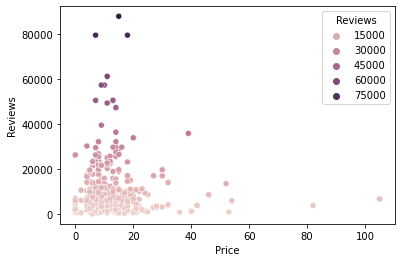

In [330]:
#Scatterplot to show the relationship between the User Rating and Reviews
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = amazon, x = price, y = reviews, hue=reviews)
plt.show()

2)

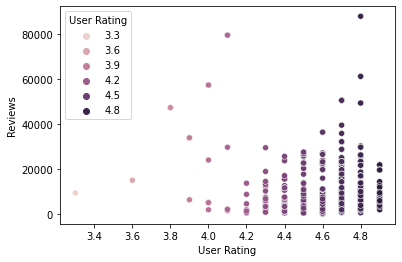

In [333]:
#Scatterplot to show the relationship between the User Rating and Reviews
sns.scatterplot(data = amazon, x = ratings, y = reviews, hue=ratings)
plt.show()

# 5. Conclusion

## 
1)The price of the book and the number of reviews are negatively correlated, so accept the null hypothesis. The higher the price, the lower are the reviews.
2)The user ratings and reviews are positively correlated. The higher user rating meant more reviews, so accept the null hypothesis.